In [149]:
import numpy as np
import tensorflow as tf
import keras

In [150]:
from keras.models import Sequential # to keep stack of convolution layers
from keras.layers import Conv2D     # convolution poeration
from keras.layers import MaxPool2D  # pooling operation for reducing image size
from keras.layers import Dense # classical neural network
from keras.layers import Flatten #to flatten the 2d image
from keras.layers import Dropout

In [151]:
model=Sequential()

input_shape=(64,64,3)

#first convolution
model.add(Conv2D(32,(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

#second convolution
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#flatten the network
model.add(Flatten())

#Full connection ANN
model.add(Dense(units=50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))

In [152]:
# defining the optimizer
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [153]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set=train_datagen.flow_from_directory(r'C:\Users\intel\Desktop\ML-project\chest_xray\train',
                                                 target_size = (64, 64),
                                                 batch_size = 16,
                                                 class_mode = 'binary')

test_set=test_datagen.flow_from_directory(r'C:\Users\intel\Desktop\ML-project\chest_xray\test',
                                                 target_size = (64, 64),
                                                 batch_size = 16,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [154]:
history=model.fit_generator(training_set,
                         steps_per_epoch = 100,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 200)

Epoch 1/10
100/100 [==============================] - 53s 534ms/step - loss: 0.3573 - acc: 0.8419 - val_loss: 0.4312 - val_acc: 0.7825
Epoch 2/10
100/100 [==============================] - 63s 632ms/step - loss: 0.1914 - acc: 0.9262 - val_loss: 0.3509 - val_acc: 0.8438
Epoch 3/10
100/100 [==============================] - 75s 752ms/step - loss: 0.1684 - acc: 0.9394 - val_loss: 0.5087 - val_acc: 0.7863
Epoch 4/10
100/100 [==============================] - 84s 843ms/step - loss: 0.1337 - acc: 0.9463 - val_loss: 1.0107 - val_acc: 0.7319
Epoch 5/10
100/100 [==============================] - 94s 936ms/step - loss: 0.1309 - acc: 0.9506 - val_loss: 1.1819 - val_acc: 0.7072
Epoch 6/10
100/100 [==============================] - 96s 955ms/step - loss: 0.1322 - acc: 0.9463 - val_loss: 0.5728 - val_acc: 0.8006
Epoch 7/10
100/100 [==============================] - 94s 940ms/step - loss: 0.1024 - acc: 0.9606 - val_loss: 0.7609 - val_acc: 0.7837
Epoch 8/10
100/100 [==============================] - 8

In [155]:
import matplotlib.pyplot as plt


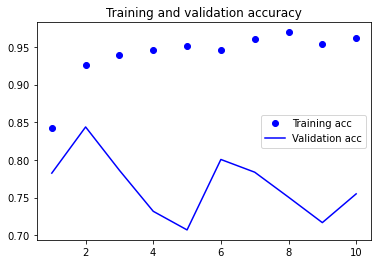

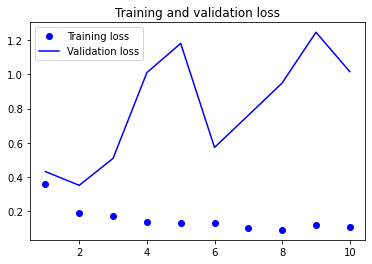

In [156]:
acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()
plt.show()


In [157]:
model.save('project.h5')

In [158]:
new_model = tf.keras.models.load_model('project.h5')

In [159]:
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                313650    
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)               

In [160]:
y_actual=test_set.classes # to get actual classes

In [161]:
y_predicted=model.predict(test_set) #predicting our model on test set

In [162]:
def thresold(x):
    if x>=0.5:
        return 1
    else:
        return 0

In [163]:
y_predicted=np.array(list(map(thresold,y_predicted))) #map applies the function on all the elemnt of the numpy array

In [164]:
from sklearn.metrics import confusion_matrix
k=confusion_matrix(y_actual,y_predicted)

In [165]:
k

array([[ 35, 199],
       [ 54, 336]], dtype=int64)

In [166]:
acc=(k[0][0]+k[1][1])/np.sum(k)
precesion=(k[1][1])/(k[1][1]+k[1][0])
recall=k[1][1]/(k[1][1]+k[0][1])
f1_score=2*pow(((1/precesion)+(1/recall)),-1)

In [167]:
print(acc,precesion,recall,f1_score)

0.594551282051282 0.8615384615384616 0.6280373831775701 0.7264864864864864


In [168]:
y_predict=model.predict(training_set) #know do the same thing with training data

In [169]:
y_actual=training_set.classes

In [170]:
y_predict=np.array(list(map(thresold,y_predict)))

In [171]:
from sklearn.metrics import confusion_matrix
k=confusion_matrix(y_actual,y_predict)

In [172]:
k

array([[ 342,  999],
       [1007, 2868]], dtype=int64)

In [173]:
print((k[0][0]+k[1][1])/np.sum(k))

0.6154141104294478
